# Part 1: Gasoline Price in Turkey
The purpose of this notebook is to get to work with the Turkey gasoline price data we retrieved from tradingeconomics.com

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [46]:
# importing the dataset
prices_df = pd.read_csv('historical_country_turkey_indicator_gasoline_prices_.csv')
prices_df.head()

,Country,Category,DateTime,Close,Frequency,HistoricalDataSymbol,LastUpdate
0,Turkey,Gasoline Prices,1995-12-31T00:00:00,0.56,Monthly,TurkeyGasPri,2015-03-03T17:23:00
1,Turkey,Gasoline Prices,1998-12-31T00:00:00,0.78,Monthly,TurkeyGasPri,2015-03-03T17:23:00
2,Turkey,Gasoline Prices,2000-12-31T00:00:00,0.88,Monthly,TurkeyGasPri,2015-03-03T17:23:00
3,Turkey,Gasoline Prices,2002-12-31T00:00:00,1.02,Monthly,TurkeyGasPri,2015-03-03T17:23:00
4,Turkey,Gasoline Prices,2004-12-31T00:00:00,1.44,Monthly,TurkeyGasPri,2015-03-03T17:23:00


In [47]:
prices_df.drop_duplicates()

,Country,Category,DateTime,Close,Frequency,HistoricalDataSymbol,LastUpdate
0,Turkey,Gasoline Prices,1995-12-31T00:00:00,0.56,Monthly,TurkeyGasPri,2015-03-03T17:23:00
1,Turkey,Gasoline Prices,1998-12-31T00:00:00,0.78,Monthly,TurkeyGasPri,2015-03-03T17:23:00
2,Turkey,Gasoline Prices,2000-12-31T00:00:00,0.88,Monthly,TurkeyGasPri,2015-03-03T17:23:00
3,Turkey,Gasoline Prices,2002-12-31T00:00:00,1.02,Monthly,TurkeyGasPri,2015-03-03T17:23:00
4,Turkey,Gasoline Prices,2004-12-31T00:00:00,1.44,Monthly,TurkeyGasPri,2015-03-03T17:23:00
...,...,...,...,...,...,...,...
138,Turkey,Gasoline Prices,2023-10-31T00:00:00,1.27,Monthly,TurkeyGasPri,2023-10-27T03:56:00
139,Turkey,Gasoline Prices,2023-11-30T00:00:00,1.22,Monthly,TurkeyGasPri,2023-12-05T07:59:00
140,Turkey,Gasoline Prices,2023-12-31T00:00:00,1.20,Monthly,TurkeyGasPri,2023-12-27T04:31:00
141,Turkey,Gasoline Prices,2024-01-31T00:00:00,1.29,Monthly,TurkeyGasPri,2024-01-29T07:11:00


In [48]:
print(prices_df.dtypes)

Country                  object
Category                 object
DateTime                 object
Close                   float64
Frequency                object
HistoricalDataSymbol     object
LastUpdate               object
dtype: object


In [49]:
# converting datetime column type to required datetime format and removing the time part:
prices_df['DateTime'] = pd.to_datetime(prices_df['DateTime']).dt.strftime('%Y-%m')
prices_df.head()

,Country,Category,DateTime,Close,Frequency,HistoricalDataSymbol,LastUpdate
0,Turkey,Gasoline Prices,1995-12,0.56,Monthly,TurkeyGasPri,2015-03-03T17:23:00
1,Turkey,Gasoline Prices,1998-12,0.78,Monthly,TurkeyGasPri,2015-03-03T17:23:00
2,Turkey,Gasoline Prices,2000-12,0.88,Monthly,TurkeyGasPri,2015-03-03T17:23:00
3,Turkey,Gasoline Prices,2002-12,1.02,Monthly,TurkeyGasPri,2015-03-03T17:23:00
4,Turkey,Gasoline Prices,2004-12,1.44,Monthly,TurkeyGasPri,2015-03-03T17:23:00


In [50]:
# removing unnecassary columns:
prices_df.drop(columns=['Frequency', 'HistoricalDataSymbol', 'LastUpdate', 'Category', 'Country'], inplace=True)
prices_df.rename(columns={'Close':'Price'}, inplace=True)
prices_df.head()

,DateTime,Price
0,1995-12,0.56
1,1998-12,0.78
2,2000-12,0.88
3,2002-12,1.02
4,2004-12,1.44


In [51]:
# we need the data from March 2016 to March 2023
start_date = '2016-03'
end_date = '2023-03'
prices_df = prices_df[(prices_df['DateTime'] >= start_date) & (prices_df['DateTime'] <= end_date)]
prices_df.reset_index(drop=True, inplace=True)

In [52]:
prices_df.head()

,DateTime,Price
0,2016-03,1.54
1,2016-04,1.58
2,2016-05,1.55
3,2016-06,1.55
4,2016-07,1.45


In [53]:
prices_df.to_csv('Turkey_gasoline_prices.csv')

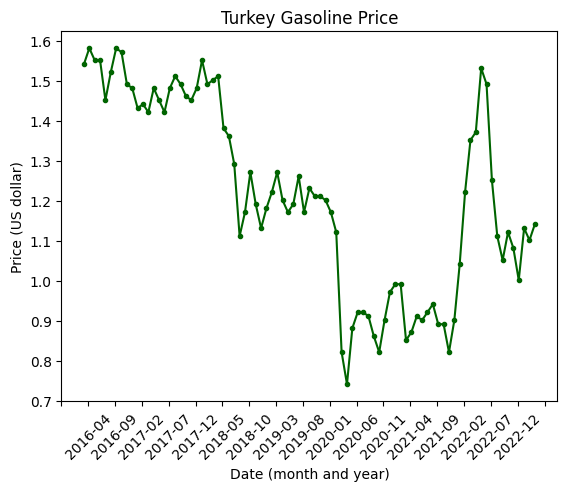

In [54]:
# plotting the dataset
x = prices_df['DateTime']
y = prices_df['Price']

fig, ax = plt.subplots()

ax.plot(x, y, marker='.', color='darkgreen')

ax.set_xlabel('Date (month and year)')
ax.set_ylabel('Price (US dollar)')
ax.set_title('Turkey Gasoline Price')

x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
ax.xaxis.set_ticks(np.arange(x_start, x_end, 5.0))
ax.yaxis.set_ticks(np.arange(y_start, y_end, 0.1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

plt.xticks(rotation=45)

plt.show()

# Part 2: Borders with Iran


The roads leading to Turkey border in Iran are as followed:

1. Macho Belt to Bazargan border which is coded as 574156
2. Khoy to Razi border which is coded as 573503
3. Sarv threeway to Sarv border which is coded as 573106

In [55]:
# importing dataframe
roads_df = pd.read_csv('AzarbayjanQharbi1395-1401.csv')
roads_df.head()

,Unnamed: 0,road_id,road_name,vehicles_total,year,month,time
0,1,573101,اروميه - مهاباد,148355.0,2016,3,2016-03-21
1,2,573102,اروميه - سلماس,190991.0,2016,3,2016-03-21
2,3,573103,سرو - اروميه,87526.0,2016,3,2016-03-21
3,4,573104,اروميه - تبريز (شهيد کلانتري),58719.0,2016,3,2016-03-21
4,5,573105,اشنويه - اروميه,58000.0,2016,3,2016-03-21


In [66]:
# filtering the data related to Macho - Bazargan
bazargan_df = roads_df[roads_df['road_id'] == 574156]
razi_df = roads_df[roads_df['road_id'] == 573503]
sarv_df = roads_df[roads_df['road_id'] == 573106]

In [67]:
bazargan_df.head()

,Unnamed: 0,road_id,road_name,vehicles_total,year,month,time
47,48,574156,کمربندي ماکو – بازرگان,19417.0,2016,3,2016-03-21
108,109,574156,کمربندي ماکو – بازرگان,55898.0,2016,4,2016-04-01
172,173,574156,کمربندي ماکو – بازرگان,58716.0,2016,5,2016-05-01
235,236,574156,کمربندي ماکو – بازرگان,56205.0,2016,6,2016-06-01
299,300,574156,کمربندي ماکو – بازرگان,53352.0,2016,7,2016-07-01


In [68]:
razi_df.head()

,Unnamed: 0,road_id,road_name,vehicles_total,year,month,time
20,21,573503,خوي - قطور (مرز رازي),18602.0,2016,3,2016-03-21
80,81,573503,خوي - قطور (مرز رازي),50681.0,2016,4,2016-04-01
141,142,573503,خوي - قطور (مرز رازي),50864.0,2016,5,2016-05-01
204,205,573503,خوي - قطور (مرز رازي),46368.0,2016,6,2016-06-01
268,269,573503,خوي - قطور (مرز رازي),50340.0,2016,7,2016-07-01


In [69]:
sarv_df.head()

,Unnamed: 0,road_id,road_name,vehicles_total,year,month,time
5,6,573106,سه راهي سرو - سرو,8509.0,2016,3,2016-03-21
65,66,573106,سه راهي سرو - سرو,18749.0,2016,4,2016-04-01
126,127,573106,سه راهي سرو - سرو,19865.0,2016,5,2016-05-01
189,190,573106,سه راهي سرو - سرو,22156.0,2016,6,2016-06-01
253,254,573106,سه راهي سرو - سرو,25375.0,2016,7,2016-07-01


In [70]:
bazargan_df['DateTime'] = pd.to_datetime(bazargan_df['time']).dt.strftime('%Y-%m')
bazargan_df.drop(columns=['year', 'month', 'Unnamed: 0', 'road_name', 'time', 'road_id'], inplace=True)
bazargan_df.rename(columns={'vehicles_total':'Bazargan_vehicles'}, inplace=True)
bazargan_df.reset_index(drop=True, inplace=True)
bazargan_df.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_20316\1857535662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bazargan_df['DateTime'] = pd.to_datetime(bazargan_df['time']).dt.strftime('%Y-%m')
C:\Users\asus\AppData\Local\Temp\ipykernel_20316\1857535662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bazargan_df.drop(columns=['year', 'month', 'Unnamed: 0', 'road_name', 'time', 'road_id'], inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_20316\1857535662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



,Bazargan_vehicles,DateTime
0,19417.0,2016-03
1,55898.0,2016-04
2,58716.0,2016-05
3,56205.0,2016-06
4,53352.0,2016-07


In [71]:
razi_df['DateTime'] = pd.to_datetime(razi_df['time']).dt.strftime('%Y-%m')
razi_df.drop(columns=['year', 'month', 'Unnamed: 0', 'road_name', 'time', 'road_id'], inplace=True)
razi_df.rename(columns={'vehicles_total':'Razi_vehicles'}, inplace=True)
razi_df.reset_index(drop=True, inplace=True)
razi_df.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_20316\4293288729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  razi_df['DateTime'] = pd.to_datetime(razi_df['time']).dt.strftime('%Y-%m')
C:\Users\asus\AppData\Local\Temp\ipykernel_20316\4293288729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  razi_df.drop(columns=['year', 'month', 'Unnamed: 0', 'road_name', 'time', 'road_id'], inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_20316\4293288729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

,Razi_vehicles,DateTime
0,18602.0,2016-03
1,50681.0,2016-04
2,50864.0,2016-05
3,46368.0,2016-06
4,50340.0,2016-07


In [74]:
sarv_df['DateTime'] = pd.to_datetime(sarv_df['time']).dt.strftime('%Y-%m')
sarv_df.drop(columns=['year', 'month', 'Unnamed: 0', 'road_name', 'time', 'road_id'], inplace=True)
sarv_df.rename(columns={'vehicles_total':'Sarv_vehicles'}, inplace=True)
sarv_df.reset_index(drop=True, inplace=True)
sarv_df.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_20316\954377923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarv_df['DateTime'] = pd.to_datetime(sarv_df['time']).dt.strftime('%Y-%m')
C:\Users\asus\AppData\Local\Temp\ipykernel_20316\954377923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sarv_df.drop(columns=['year', 'month', 'Unnamed: 0', 'road_name', 'time', 'road_id'], inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_20316\954377923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

,Sarv_vehicles,DateTime
0,8509.0,2016-03
1,18749.0,2016-04
2,19865.0,2016-05
3,22156.0,2016-06
4,25375.0,2016-07


In [58]:
prices_df.tail()

,DateTime,Price
80,2022-11,1.08
81,2022-12,1.00
82,2023-01,1.13
83,2023-02,1.10
84,2023-03,1.14


In [76]:
razi_df.tail()

,Razi_vehicles,DateTime
79,55714.0,2022-10
80,18584.0,2022-11
81,45556.0,2022-12
82,21099.0,2023-01
83,35964.0,2023-02


In [84]:
turkey_border = pd.merge(prices_df, bazargan_df, on=['DateTime'])
turkey_border = pd.merge(turkey_border, sarv_df, on=['DateTime'])
turkey_border = pd.merge(turkey_border, razi_df, on=['DateTime'])
turkey_border.head()

,DateTime,Price,Bazargan_vehicles,Sarv_vehicles,Razi_vehicles
0,2016-03,1.54,19417.0,8509.0,18602.0
1,2016-04,1.58,55898.0,18749.0,50681.0
2,2016-05,1.55,58716.0,19865.0,50864.0
3,2016-06,1.55,56205.0,22156.0,46368.0
4,2016-07,1.45,53352.0,25375.0,50340.0


In [85]:
turkey_border.to_csv('turkey_border.csv')

The plot comparing the two values:

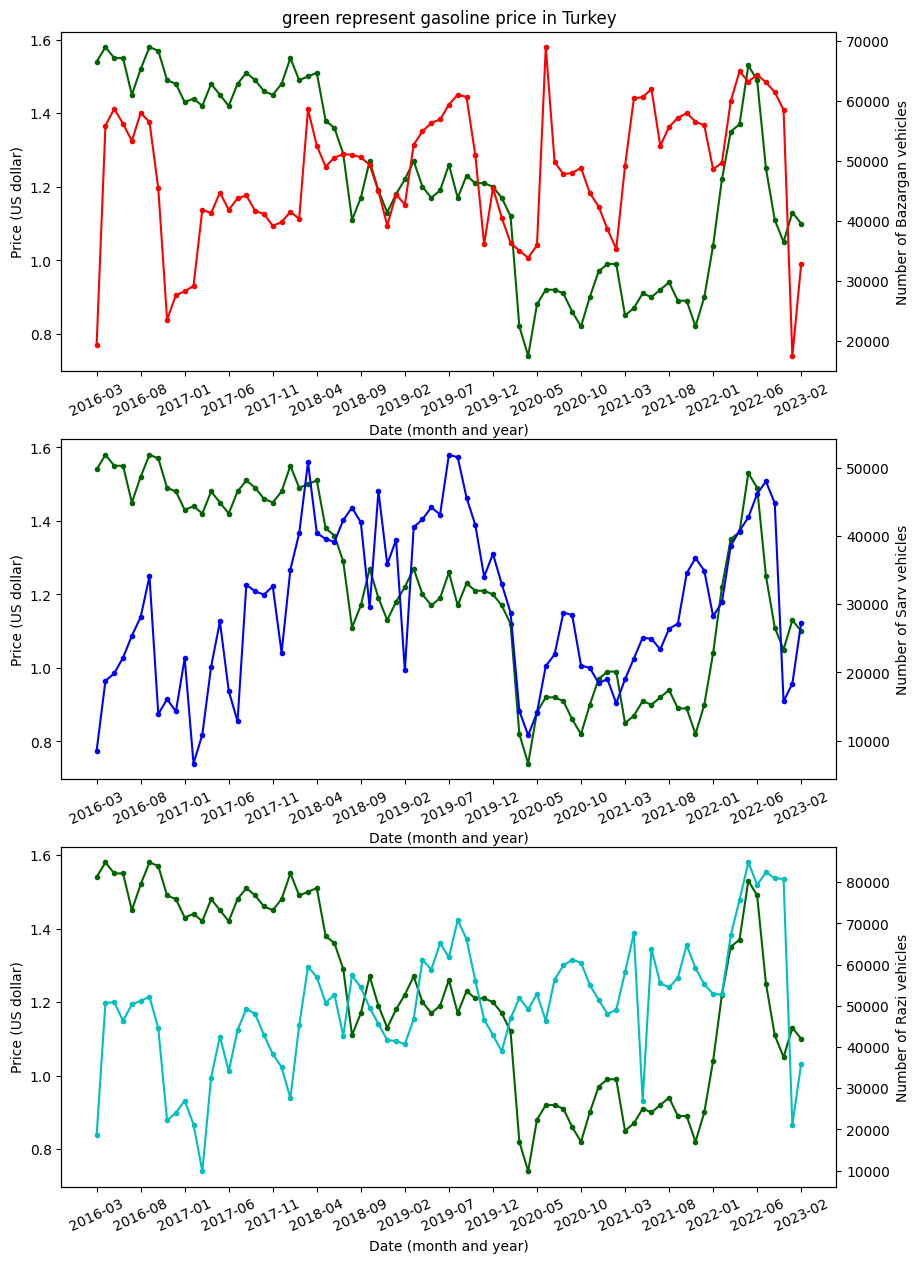

In [139]:
# plotting the dataset
x = turkey_border['DateTime']
gasoline_prices = turkey_border['Price']

bazargan_vehicles = turkey_border['Bazargan_vehicles']
sarv_vehicles = turkey_border['Sarv_vehicles']
razi_vehicles = turkey_border['Razi_vehicles']

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# the first plot:
axs[0].plot(x, gasoline_prices, marker='.', color='darkgreen')

axs[0].set_xlabel('Date (month and year)')
axs[0].set_ylabel('Price (US dollar)')
axs[0].tick_params(axis='x', labelrotation=25)
axs[0].set_title('green represent gasoline price in Turkey')

ax1 = axs[0].twinx()
ax1.plot(x, bazargan_vehicles, marker='.', color='r')
ax1.set_ylabel('Number of Bazargan vehicles')

plt.xticks(np.arange(0, len(x)+1, 5))

# the second plot:
axs[1].plot(x, gasoline_prices, marker='.', color='darkgreen')
axs[1].set_xlabel('Date (month and year)')
axs[1].set_ylabel('Price (US dollar)')
axs[1].tick_params(axis='x', labelrotation=25)
ax2 = axs[1].twinx()
ax2.plot(x, sarv_vehicles, marker='.', color='b')
ax2.set_ylabel('Number of Sarv vehicles')

plt.xticks(np.arange(0, len(x)+1, 5))

# the third plot:
axs[2].plot(x, gasoline_prices, marker='.', color='darkgreen')
axs[2].set_xlabel('Date (month and year)')
axs[2].set_ylabel('Price (US dollar)')
axs[2].tick_params(axis='x', labelrotation=25)
ax3 = axs[2].twinx()
ax3.plot(x, razi_vehicles, marker='.', color='c')
ax3.set_ylabel('Number of Razi vehicles')

plt.xticks(np.arange(0, len(x)+1, 5))
plt.show()

Normalizing both values:

In [116]:
normal_turkey_border = pd.DataFrame()
normal_turkey_border['DateTime'] = turkey_border['DateTime']
for column_name, column_data in turkey_border.items():
    if not column_name == 'DateTime':
        normal_turkey_border[column_name] = (column_data - column_data.mean())/column_data.std()

In [117]:
normal_turkey_border.head()

,DateTime,Price,Bazargan_vehicles,Sarv_vehicles,Razi_vehicles
0,2016-03,1.295536,-2.615367,-1.842483,-2.117775
1,2016-04,1.457478,0.716362,-0.949502,0.019324
2,2016-05,1.336021,0.973723,-0.852180,0.031515
3,2016-06,1.336021,0.744399,-0.652393,-0.268008
4,2016-07,0.931166,0.483841,-0.371680,-0.003394


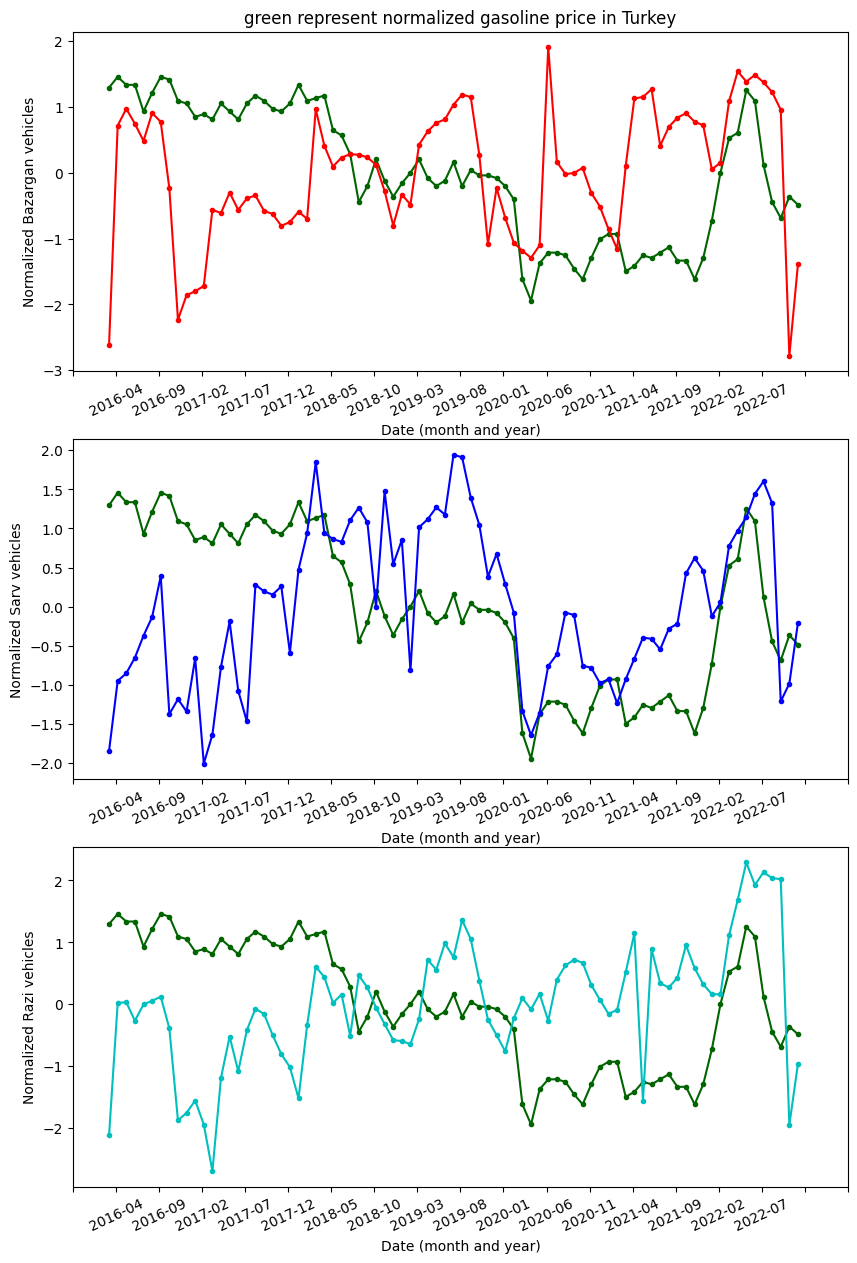

In [138]:
# plotting the normalized dataset
x = normal_turkey_border['DateTime']
gasoline_prices = normal_turkey_border['Price']

bazargan_vehicles = normal_turkey_border['Bazargan_vehicles']
sarv_vehicles = normal_turkey_border['Sarv_vehicles']
razi_vehicles = normal_turkey_border['Razi_vehicles']

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

axs[0].plot(x, gasoline_prices, marker='.', color='darkgreen')
axs[0].plot(x, bazargan_vehicles, marker='.', color='r')
axs[0].set_xlabel('Date (month and year)')
axs[0].set_ylabel('Normalized Bazargan vehicles')
axs[0].tick_params(axis='x', labelrotation=25)
axs[0].set_title('green represent normalized gasoline price in Turkey')

start, end = ax.get_xlim()
axs[0].xaxis.set_ticks(np.arange(start, end, 5))

axs[1].plot(x, gasoline_prices, marker='.', color='darkgreen')
axs[1].plot(x, sarv_vehicles, marker='.', color='b')
axs[1].set_xlabel('Date (month and year)')
axs[1].set_ylabel('Normalized Sarv vehicles')
axs[1].tick_params(axis='x', labelrotation=25)

start, end = ax.get_xlim()
axs[1].xaxis.set_ticks(np.arange(start, end, 5))


axs[2].plot(x, gasoline_prices, marker='.', color='darkgreen')
axs[2].plot(x, razi_vehicles, marker='.', color='c')
axs[2].set_xlabel('Date (month and year)')
axs[2].set_ylabel('Normalized Razi vehicles')
axs[2].tick_params(axis='x', labelrotation=25)

start, end = ax.get_xlim()
axs[2].xaxis.set_ticks(np.arange(start, end, 5))

plt.show()
